In [3]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer
from pydataset import data
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector


import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/Users/nomer/codeup-data-science/Functions')
import function

import wrangle
import env
import explore
import feature_engineering
import regression_function

In [4]:
df = wrangle.clean_zillow(wrangle.wrangle_get_zillow())

this file exists, reading from csv file


In [5]:
df.head()

,bedroom,bathroom,square_ft,property_value,yr_built,tax,county
4,4.0,2.0,3633.0,296425.0,2005,6941.39,LA
6,3.0,4.0,1620.0,847770.0,2011,10244.94,LA
7,3.0,2.0,2077.0,646760.0,1926,7924.68,LA
11,0.0,0.0,1200.0,5328.0,1972,91.60,LA
14,0.0,0.0,171.0,6920.0,1973,255.17,LA


In [6]:
function.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,bedroom,19,"[4.0, 3.0, 0.0, 5.0, 2.0, 1.0, 6.0, 7.0, 8.0, 9.0, 25.0, 10.0, 11.0, 14.0, 15.0, 13.0,...",0,0.0,float64
1,bathroom,38,"[2.0, 4.0, 0.0, 1.0, 2.5, 3.5, 3.0, 5.5, 4.5, 5.0, 1.5, 7.5, 6.0, 10.0, 8.0, 7.0, 11.0...",0,0.0,float64
2,square_ft,10557,"[3633.0, 1620.0, 2077.0, 1200.0, 171.0, 203.0, 1244.0, 1300.0, 1222.0, 4144.0, 1821.0,...",0,0.0,float64
3,property_value,588178,"[296425.0, 847770.0, 646760.0, 5328.0, 6920.0, 14166.0, 169471.0, 233266.0, 290492.0, ...",0,0.0,float64
4,yr_built,153,"[2005, 2011, 1926, 1972, 1973, 1960, 1950, 1951, 2016, 2013, 2014, 2015, 2012, 1944, 1...",0,0.0,int64
5,tax,915868,"[6941.39, 10244.94, 7924.68, 91.6, 255.17, 163.79, 2532.88, 3110.99, 3870.25, 14820.1,...",0,0.0,float64
6,county,3,"[LA, Orange, Ventura]",0,0.0,object


In [7]:
def one_hot_encoder(df):
    '''
    This function will encode object_type variables changed to number_type variables
    ready for ML modeling

    Example cat_cols: cat_cols = ['sex','smoker', 'day', 'time'] 
    Input: df, cat_cols
    Output: df_encoded
    '''
    cat_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            cat_cols.append(col)

    # create an instance of the OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # fit the encoder to the categorical variables into one_hot_encoder features
    encoder.fit(df[cat_cols])

    # transform the categorical variables from the one_hot_encoder features  
    # and rename variable
    encoded = encoder.transform(df[cat_cols])

    # create new df with one_hot_encoder from categorical features
    one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
    
    # concatenate the original df with the one_hot_encoded df
    df = pd.concat([df, one_hot_df], axis=1).drop(columns=cat_cols)

    return df

In [8]:
one_df = one_hot_encoder(df)
function.check_columns(one_df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,bedroom,19,"[4.0, 3.0, 0.0, 5.0, 2.0, 1.0, 6.0, 7.0, 8.0, 9.0, 25.0, 10.0, 11.0, 14.0, 15.0, 13.0,...",12534,0.005822,float64
1,bathroom,38,"[2.0, 4.0, 0.0, 1.0, 2.5, 3.5, 3.0, 5.5, 4.5, 5.0, 1.5, 7.5, 6.0, 10.0, 8.0, 7.0, 11.0...",12534,0.005822,float64
2,square_ft,10557,"[3633.0, 1620.0, 2077.0, 1200.0, 171.0, 203.0, 1244.0, 1300.0, 1222.0, 4144.0, 1821.0,...",12534,0.005822,float64
3,property_value,588178,"[296425.0, 847770.0, 646760.0, 5328.0, 6920.0, 14166.0, 169471.0, 233266.0, 290492.0, ...",12534,0.005822,float64
4,yr_built,153,"[2005.0, 2011.0, 1926.0, 1972.0, 1973.0, 1960.0, 1950.0, 1951.0, 2016.0, 2013.0, 2014....",12534,0.005822,float64
5,tax,915868,"[6941.39, 10244.94, 7924.68, 91.6, 255.17, 163.79, 2532.88, 3110.99, 3870.25, 14820.1,...",12534,0.005822,float64
6,county_LA,2,"[1.0, 0.0, nan]",12534,0.005822,float64
7,county_Orange,2,"[0.0, 1.0, nan]",12534,0.005822,float64
8,county_Ventura,2,"[0.0, 1.0, nan]",12534,0.005822,float64


In [9]:
train, validate, test = wrangle.wrangle_zillow(df)

In [10]:
train.shape, validate.shape, test.shape

((1284141, 7), (428047, 7), (428047, 7))

In [11]:
train_encoded, validate_encoded, test_encoded = function.preprocess(train, validate, test)

In [12]:
train_encoded.head()

,bedroom,bathroom,square_ft,property_value,yr_built,tax,county_Orange,county_Ventura
462820,5.0,4.0,3011.0,710674.0,2005,7561.14,0,1
3880,3.0,2.0,1682.0,603333.0,1961,7086.19,0,0
992263,4.0,2.0,1433.0,82804.0,1954,1134.83,0,0
311722,3.0,2.5,2001.0,355444.0,1999,4174.92,0,1
787985,4.0,2.0,2277.0,571000.0,1962,7113.02,0,0


In [13]:
function.check_columns(test_encoded)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,bedroom,18,"[4.0, 2.0, 3.0, 1.0, 5.0, 6.0, 0.0, 10.0, 9.0, 7.0, 8.0, 11.0, 13.0, 25.0, 15.0, 12.0,...",0,0.0,float64
1,bathroom,34,"[2.0, 1.0, 3.0, 5.0, 4.0, 2.5, 1.5, 5.5, 3.5, 4.5, 7.0, 0.0, 6.5, 8.0, 6.0, 8.5, 7.5, ...",0,0.0,float64
2,square_ft,7407,"[1892.0, 1411.0, 1196.0, 2368.0, 3482.0, 1138.0, 1981.0, 1040.0, 1326.0, 1489.0, 603.0...",0,0.0,float64
3,property_value,219492,"[114668.0, 75656.0, 406000.0, 1441578.0, 1277065.0, 68631.0, 952388.0, 112009.0, 34941...",0,0.0,float64
4,yr_built,141,"[1959, 1950, 1953, 1936, 1965, 1955, 1963, 1956, 1954, 1974, 1946, 1995, 1957, 1938, 1...",0,0.0,int64
5,tax,336578,"[1565.3, 876.98, 10431.05, 16525.72, 14567.56, 1177.91, 10557.66, 1962.66, 4316.44, 53...",0,0.0,float64
6,county_Orange,2,"[1, 0]",0,0.0,int64
7,county_Ventura,2,"[0, 1]",0,0.0,int64


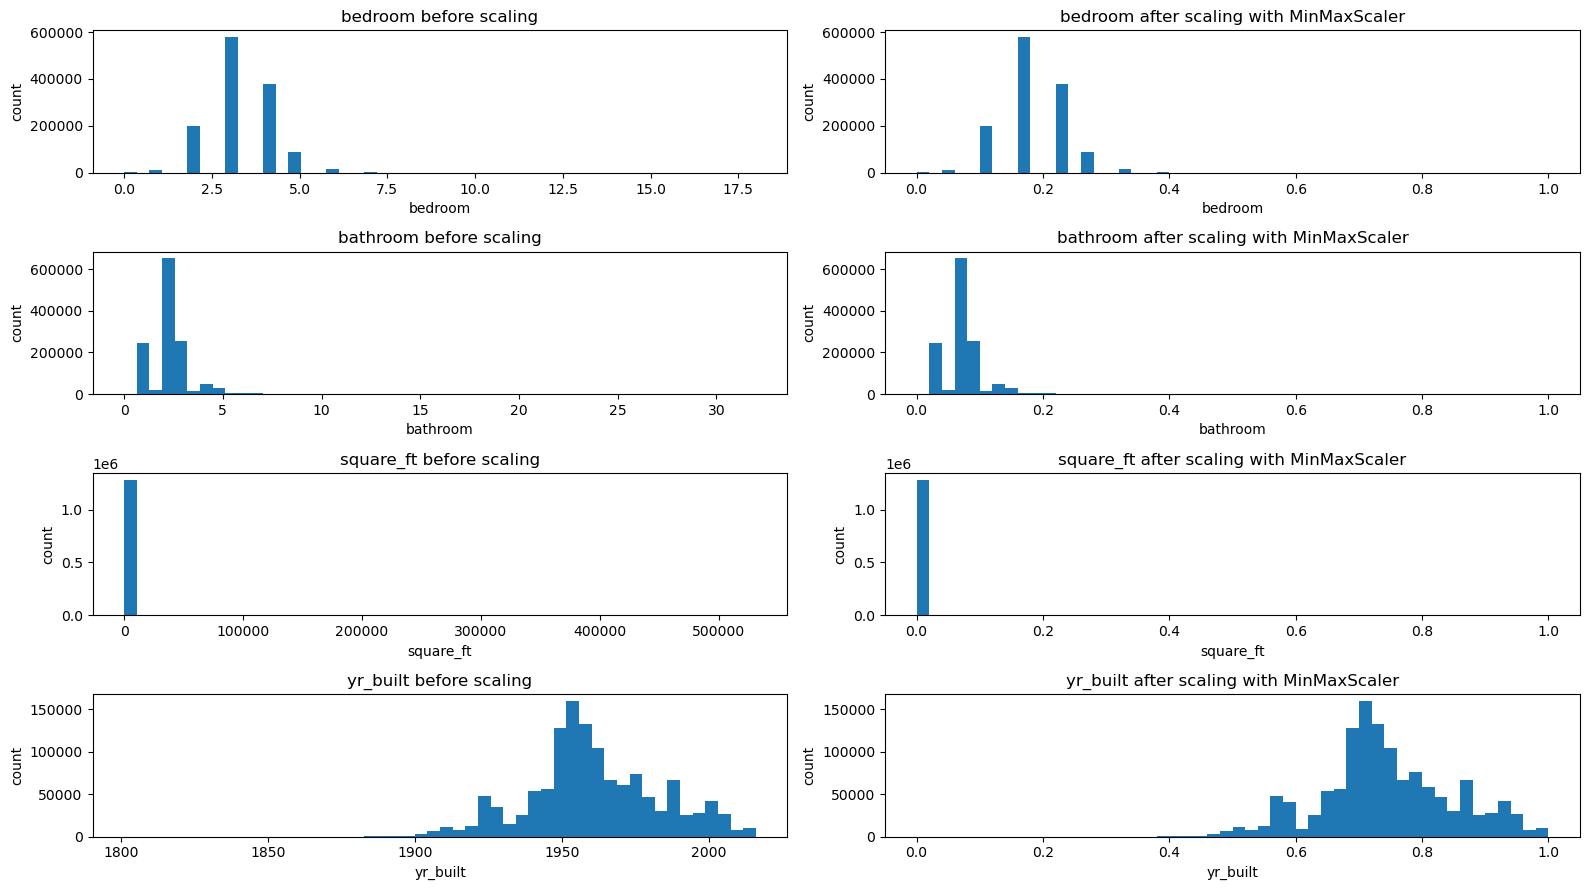

In [14]:
columns = ['bedroom', 'bathroom', 'square_ft', 'yr_built']
regression_function.visualize_scaler(scaler=MinMaxScaler(), df=train_encoded, 
                                     columns_to_scale=columns, bins=50)

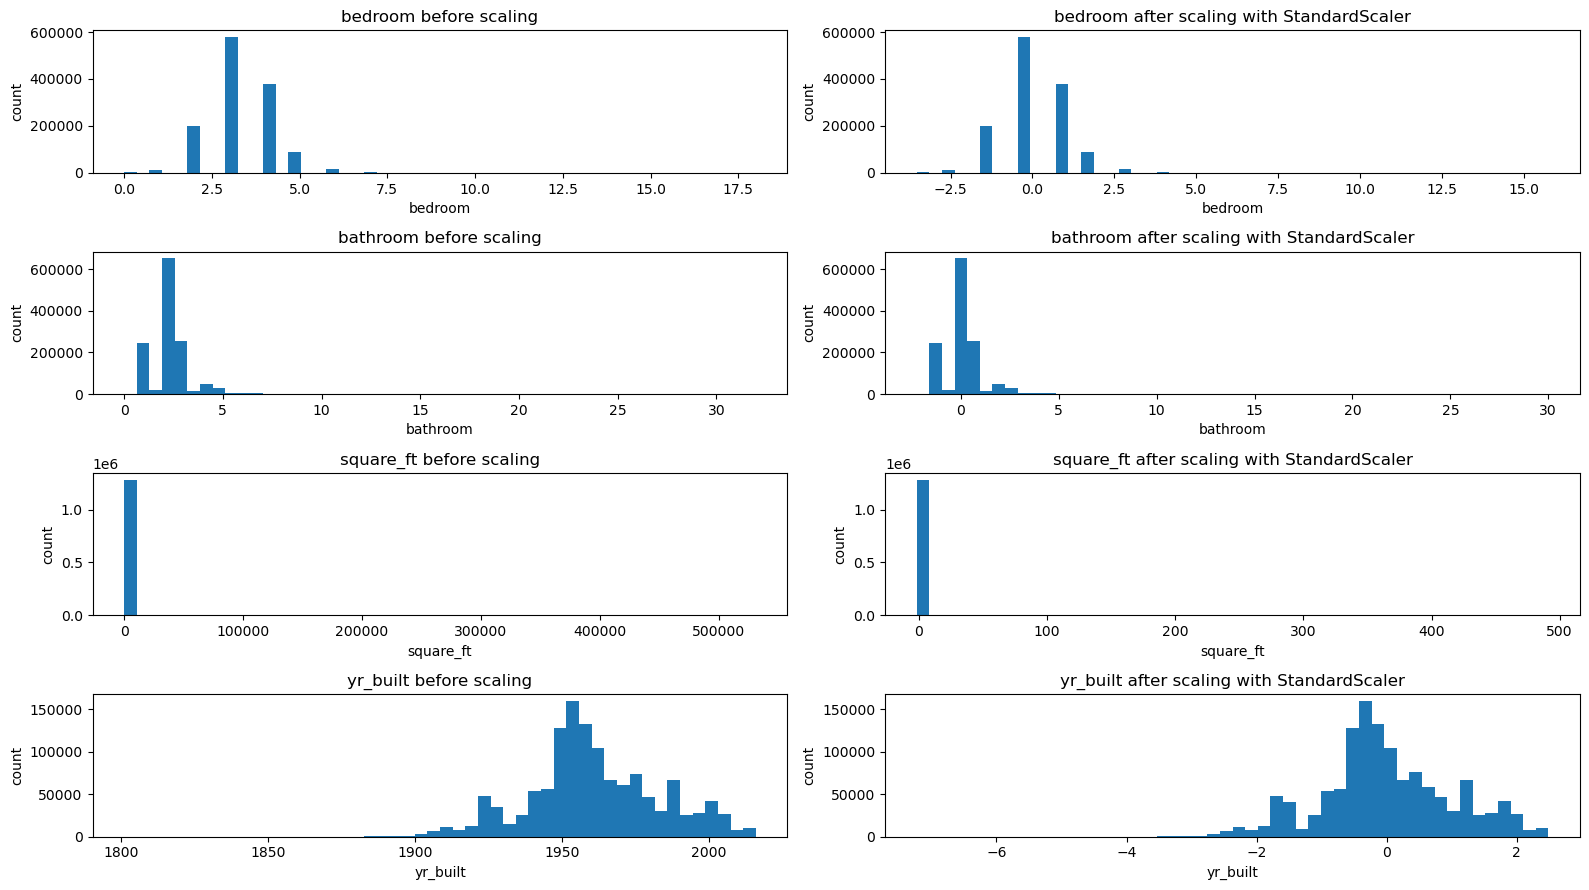

In [15]:
regression_function.visualize_scaler(scaler=StandardScaler(), df=train_encoded, 
                                     columns_to_scale=columns, bins=50)

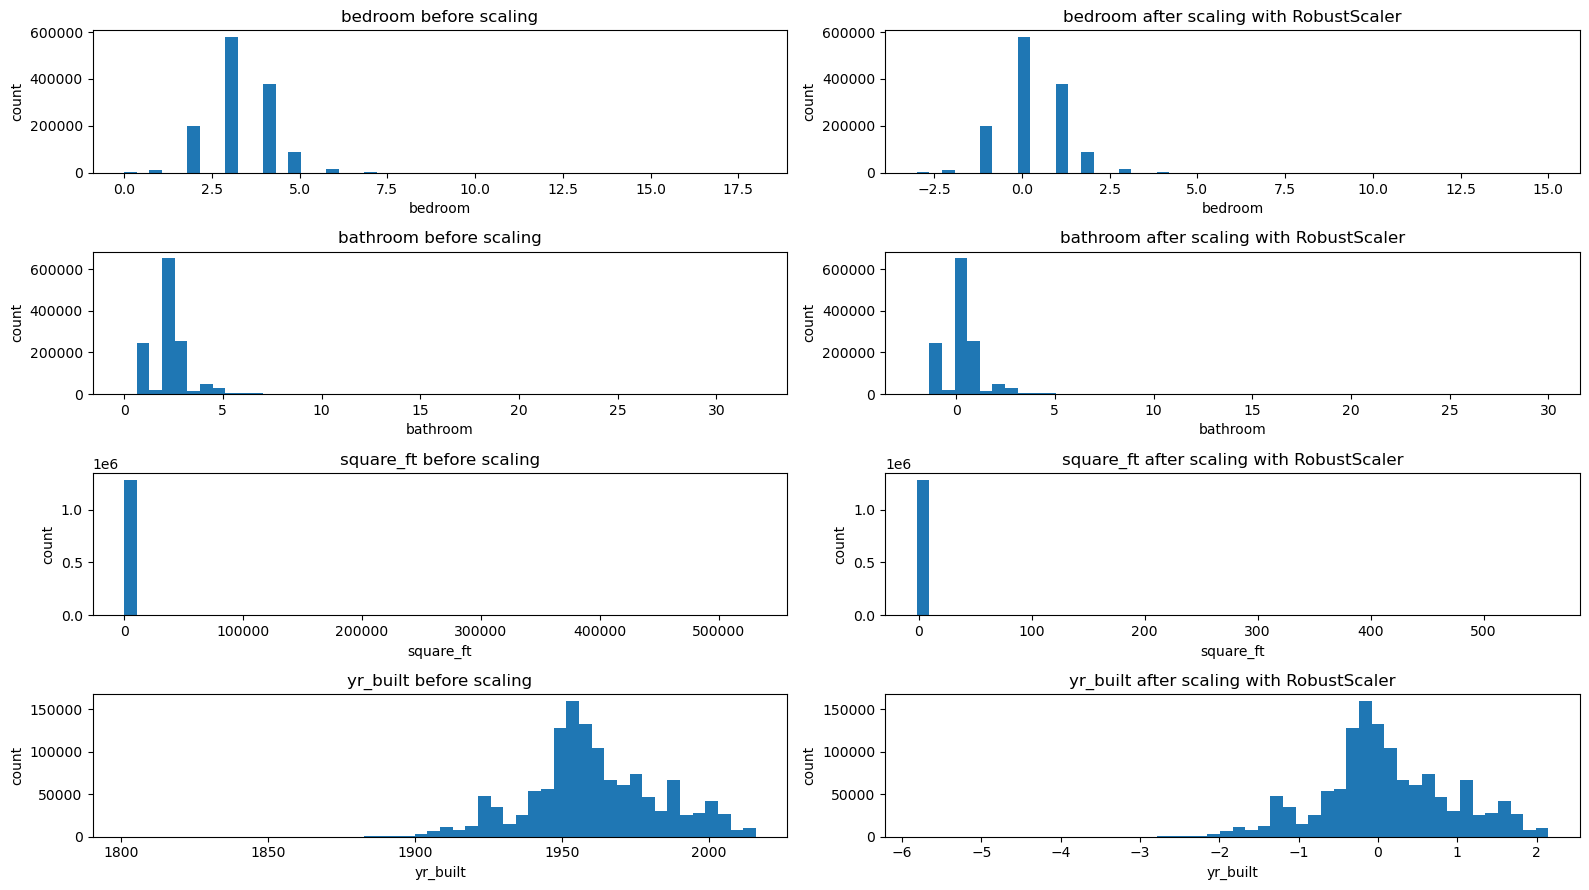

In [16]:
regression_function.visualize_scaler(scaler=RobustScaler(), df=train_encoded, 
                                     columns_to_scale=columns, bins=50)

In [17]:
train_encoded_robust, validate_encoded_robust, test_encoded_robust = regression_function.scaled_version(
                                                    train_encoded, validate_encoded, test_encoded, scaler=RobustScaler(), 
                                                    columns_to_scale=columns)

In [18]:
test_encoded_robust.head()

,bedroom,bathroom,square_ft,property_value,yr_built,tax,county_Orange,county_Ventura
1656157,1.0,0.0,0.283158,114668.0,0.037037,1565.30,1,0
1948549,-1.0,-1.0,-0.223158,75656.0,-0.296296,876.98,0,1
1691317,0.0,0.0,-0.449474,406000.0,-0.185185,10431.05,0,0
1618983,1.0,1.0,0.784211,1441578.0,-0.814815,16525.72,0,0
1199756,1.0,3.0,1.956842,1277065.0,0.259259,14567.56,0,0


In [19]:
# establishing target variable
target = 'property_value'

In [20]:
# using a function to apply robust scaler and split target variable 
X_train, y_train, X_validate, y_validate, X_test, y_test = function.split_target(train_encoded_robust, 
                                                         validate_encoded_robust, test_encoded_robust, target)

In [21]:
X_train.head(3)

,bedroom,bathroom,square_ft,yr_built,tax,county_Orange,county_Ventura
462820,2.0,2.0,1.461053,1.740741,7561.14,0,1
3880,0.0,0.0,0.062105,0.111111,7086.19,0,0
992263,1.0,0.0,-0.200000,-0.148148,1134.83,0,0


In [22]:
y_train.head(3)

,property_value
462820,710674.0
3880,603333.0
992263,82804.0


In [23]:
# using a function to check on the split target
function.check_columns(X_validate)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,bedroom,17,"[2.0, 1.0, 0.0, -2.0, -1.0, 3.0, -3.0, 6.0, 4.0, 5.0, 7.0, 8.0, 15.0, 12.0, 10.0, 13.0...",0,0.0,float64
1,bathroom,31,"[2.0, 1.0, 0.0, -0.5, -1.0, 0.5, -2.0, 1.5, 2.5, 3.5, 3.0, 4.0, 5.0, 6.0, 5.5, 4.5, 7....",0,0.0,float64
2,square_ft,7496,"[2.3926315789473684, 0.3568421052631579, 0.3968421052631579, -0.08105263157894736, -0....",0,0.0,float64
3,yr_built,139,"[-1.2592592592592593, 0.037037037037037035, 0.3333333333333333, 1.1481481481481481, -0...",0,0.0,float64
4,tax,336695,"[33112.84, 4774.05, 8734.68, 2798.54, 932.4, 2740.59, 2998.72, 6959.52, 6610.02, 6584....",0,0.0,float64
5,county_Orange,2,"[0, 1]",0,0.0,int64
6,county_Ventura,2,"[0, 1]",0,0.0,int64


> ### Baseline and Median

In [24]:
# taking the baseline and save it to a variable
pred_mean = y_train.mean()[0]
pred_mean

460846.25053635077

In [25]:
# taking the median 
pred_median = y_train.median()[0]
pred_median

328400.0

In [26]:
# taking the baseline and save it to a variable
pred_mean = y_train.mean()[0]
# taking the median 
pred_median = y_train.median()[0]

# assigning the baseline in a new column to y_train and y_validate
y_train = y_train.assign(pred_mean=pred_mean)
y_validate = y_validate.assign(pred_mean=pred_mean)

# assigning the median in a new column to y_train and y_validate
y_train = y_train.assign(pred_median=pred_median)
y_validate = y_validate.assign(pred_median=pred_median)

# finding out the rmse for the mean value from y_train and y_validate
rmse_baseline_train = mean_squared_error(y_train.property_value, y_train.pred_mean) ** .5
rmse_baseline_validate = mean_squared_error(y_validate.property_value, y_validate.pred_mean) ** .5

# finding out the r2 for the mean value from y_train and y_validate
r2_baseline_train = r2_score(y_train.property_value, y_train.pred_mean)
r2_baseline_validate = r2_score(y_validate.property_value, y_validate.pred_mean)

# printing the rmse values for the baseline mean 
print(f'Mean Model')
print(f'RMSE Train: {rmse_baseline_train} \nRMSE validate: {rmse_baseline_validate}\n')

# creating a dictionary for rmse and r2 from the baseline
metrics_info = {
                'Model':'baseline_mean',
                'RMSE_train':rmse_baseline_train,
                'RMSE_validate':rmse_baseline_validate,
                'r2_train':r2_baseline_train,
                'r2_validate':r2_baseline_validate
                }
metrics_list = [metrics_info]

# finding out the rmse for the median from y_train and y_validate
rmse_median_train = mean_squared_error(y_train.property_value, y_train.pred_median) ** .5
rmse_median_validate = mean_squared_error(y_validate.property_value, y_validate.pred_median) ** .5

# finding out the r2 for the median from y_train and y_validate
r2_median_train = r2_score(y_train.property_value, y_train.pred_median)
r2_median_validate = r2_score(y_validate.property_value, y_validate.pred_median)

# printing the r2 values for the baseline median
print(f'Median Model')
print(f'RMSE Train: {rmse_baseline_train} \nRMSE validate: {rmse_baseline_validate}')

# adding the rmse and r2 from median to the dictionary
metrics_info = {
                'Model':'baseline_median',
                'RMSE_train':rmse_median_train,
                'RMSE_validate':rmse_median_validate,
                'r2_train':r2_median_train,
                'r2_validate':r2_median_validate
                }
metrics_list.append(metrics_info)

Mean Model
RMSE Train: 688054.7194082882 
RMSE validate: 662210.5845311697

Median Model
RMSE Train: 688054.7194082882 
RMSE validate: 662210.5845311697


In [46]:
def evaluate_pred(y, yhat):
    '''
    This function will take target variable and the target prediction
    Example of y: y_train[['property_value']]
    Example of yhat: lr = LinearRegression()
                    lr.predict(X_train)
    
    Input: y, yhat
    Output: rmse, r2
    '''
    
    rmse = mean_squared_error(y, yhat, squared=False) ** .5
    r2 = r2_score(y, yhat) 
    
    print(f'RMSE: {rmse}\n r2: {r2}')
    
    return rmse, r2

In [51]:
rmse, r2 = evaluate_pred(y_train[['property_value']], lr.predict(X_train))

RMSE: 297.9364416131964
 r2: 0.9833563509412161


In [49]:
rmse, r2

(297.9364416131964, 0.9833563509412161)

> ### Linear Regression 

In [50]:
# creating the model
lr = LinearRegression()

# fit the model 
lr.fit(X_train, y_train[['property_value']])

# trying to predict and assigning the values to y_train and y_validate
y_train = y_train.assign(pred_LinearRegression=lr.predict(X_train))
y_validate = y_validate.assign(pred_LinearRegression=lr.predict(X_validate))

# taking the rmse 
rmse_median_train = mean_squared_error(y_train[['property_value']], y_train.pred_LinearRegression) ** .5
rmse_median_validate = mean_squared_error(y_validate[['property_value']], y_validate.pred_LinearRegression) ** .5

# taking the r2
r2_median_train = r2_score(y_train[['property_value']], y_train.pred_LinearRegression)
r2_median_validate = r2_score(y_validate[['property_value']], y_validate.pred_LinearRegression)

# printing the rmse values for LinearRegression
print(f'LinearRegression Model')
print(f'RMSE Train: {rmse_baseline_train} \nRMSE validate: {rmse_baseline_validate}')

# adding the rmse and r2 information of LinearRegression to the dictionary
metrics_info = {
                'Model':'LinearRegression',
                'RMSE_train':rmse_median_train,
                'RMSE_validate':rmse_median_validate,
                'r2_train':r2_median_train,
                'r2_validate':r2_median_validate
                }
metrics_list.append(metrics_info)

LinearRegression Model
RMSE Train: 688054.7194082882 
RMSE validate: 662210.5845311697


> ### LassoLars

In [28]:
# creating the model
ll = LassoLars(alpha=1, normalize=False)

# fit the model
ll.fit(X_train, y_train[['property_value']])

# trying to predict and assigning the values to y_train and y_validate
y_train = y_train.assign(pred_LassoLars=ll.predict(X_train))
y_validate = y_validate.assign(pred_LassoLars=ll.predict(X_validate))

# taking the rmse
rmse_median_train = mean_squared_error(y_train[['property_value']], y_train.pred_LassoLars) ** .5
rmse_median_validate = mean_squared_error(y_validate[['property_value']], y_validate.pred_LassoLars) ** .5

# taking the r2
r2_median_train = r2_score(y_train[['property_value']], y_train.pred_LassoLars)
r2_median_validate = r2_score(y_validate[['property_value']], y_validate.pred_LassoLars)

# printing the rmse values for LassoLars
print(f'LassoLars Model')
print(f'RMSE Train: {rmse_baseline_train} \nRMSE validate: {rmse_baseline_validate}')

# adding the rmse and r2 information of LassoLars to the dictionary
metrics_info = {
                'Model':'LassoLars',
                'RMSE_train':rmse_median_train,
                'RMSE_validate':rmse_median_validate,
                'r2_train':r2_median_train,
                'r2_validate':r2_median_validate
                }
metrics_list.append(metrics_info)

LassoLars Model
RMSE Train: 688054.7194082882 
RMSE validate: 662210.5845311697


> ### PolynomialFeatures

In [29]:
# creating PolynomialFeatures model
pf = PolynomialFeatures(degree=2)

# fit the model
X_train_d2 = pf.fit_transform(X_train)
X_validate_d2 = pf.transform(X_validate)

# Create LinearRegression object
lp = LinearRegression()

# Fit the model to the training data
lp.fit(X_train_d2, y_train[['property_value']])

# Make predictions on the training and validation sets
y_train = y_train.assign(pred_PoloynomialFeatures=lp.predict(X_train_d2))
y_validate = y_validate.assign(pred_PoloynomialFeatures=lp.predict(X_validate_d2))

# Calculating RMSE for the model on both the training and validation sets
rmse_median_train = mean_squared_error(y_train[['property_value']], y_train.pred_PoloynomialFeatures) ** .5
rmse_median_validate = mean_squared_error(y_validate[['property_value']], y_validate.pred_PoloynomialFeatures) ** .5

# Calculating r2 score 
r2_median_train = r2_score(y_train[['property_value']], y_train.pred_PoloynomialFeatures)
r2_median_validate = r2_score(y_validate[['property_value']], y_validate.pred_PoloynomialFeatures)

# printing the rmse values for PolynomialFeatures
print(f'PolynomialFeatures Model')
print(f'RMSE Train: {rmse_baseline_train} \nRMSE validate: {rmse_baseline_validate}')

# adding the rmse and r2 information of PolynomialFeatures to the dictionary
metrics_info = {
                'Model':'PolynomialFeatures',
                'RMSE_train':rmse_median_train,
                'RMSE_validate':rmse_median_validate,
                'r2_train':r2_median_train,
                'r2_validate':r2_median_validate
                }
metrics_list.append(metrics_info)

PolynomialFeatures Model
RMSE Train: 688054.7194082882 
RMSE validate: 662210.5845311697


> ### TweediRegressor (GLM)

In [30]:
# creating the TweediRegressor model
tr = TweedieRegressor(power=1, alpha=0)

# fit the model
tr.fit(X_train, y_train[['property_value']])

# Make predictions on the training and validation sets
y_train = y_train.assign(pred_TweedieRegressor=tr.predict(X_train))
y_validate = y_validate.assign(pred_TweedieRegressor=tr.predict(X_validate))

# Calculating RMSE scores for the model on both the training and validation sets
rmse_median_train = mean_squared_error(y_train[['property_value']], y_train.pred_TweedieRegressor) ** .5
rmse_median_validate = mean_squared_error(y_validate[['property_value']], y_validate.pred_TweedieRegressor) ** .5

# Calculating r2 score for the model on training and validation sets
r2_median_train = r2_score(y_train[['property_value']], y_train.pred_TweedieRegressor)
r2_median_validate = r2_score(y_validate[['property_value']], y_validate.pred_TweedieRegressor)

# printing the rmse and r2 information of TweediRegressor 
print(f'TweedieRegressor Model')
print(f'RMSE Train: {rmse_baseline_train} \nRMSE validate: {rmse_baseline_validate}')

# adding the rmse and r2 information of TweedieRegressor to the dictionary
metrics_info = {
                'Model':'TweediRegressor',
                'RMSE_train':rmse_median_train,
                'RMSE_validate':rmse_median_validate,
                'r2_train':r2_median_train,
                'r2_validate':r2_median_validate
                }
metrics_list.append(metrics_info)

TweediRegressor Model
RMSE Train: 688054.7194082882 
RMSE validate: 662210.5845311697


In [31]:
y_train

,property_value,pred_mean,pred_median,pred_LinearRegression,pred_LassoLars,pred_PoloynomialFeatures,pred_TweedieRegressor
462820,710674.0,460846.250536,328400.0,6.484227e+05,6.484134e+05,6.394968e+05,460846.250536
3880,603333.0,460846.250536,328400.0,5.691539e+05,5.691584e+05,5.753605e+05,460846.250536
992263,82804.0,460846.250536,328400.0,5.766449e+04,5.767076e+04,7.092538e+04,460846.250536
311722,355444.0,460846.250536,328400.0,3.581336e+05,3.581229e+05,3.447684e+05,460846.250536
787985,571000.0,460846.250536,328400.0,5.695099e+05,5.695178e+05,5.761497e+05,460846.250536
...,...,...,...,...,...,...,...
1966409,312978.0,460846.250536,328400.0,3.038573e+05,3.038620e+05,3.130042e+05,460846.250536
1248263,417545.0,460846.250536,328400.0,3.711475e+05,3.711435e+05,3.641214e+05,460846.250536
28211,300584.0,460846.250536,328400.0,2.936566e+05,2.936642e+05,2.970579e+05,460846.250536
279547,1115000.0,460846.250536,328400.0,1.124300e+06,1.124294e+06,1.139589e+06,460846.250536


In [32]:
metrics_df = pd.DataFrame(metrics_list)

In [43]:
pd.options.display.float_format = '{:.4f}'.format
metrics_df

,Model,RMSE_train,RMSE_validate,r2_train,r2_validate
0,baseline_mean,688054.7194,662210.5845,0.0000,-0.0000
1,baseline_median,700686.3108,675439.8151,-0.0371,-0.0404
2,LinearRegression,88766.1232,87911.2916,0.9834,0.9824
3,LassoLars,88766.1235,87911.1975,0.9834,0.9824
4,PolynomialFeatures,85332.8265,92613.1296,0.9846,0.9804
5,TweediRegressor,688054.7194,662210.5845,0.0000,-0.0000
